In [161]:
import pandas as pd
df=pd.read_csv('passengers.csv')

df.columns=['month','pax']
df=df.iloc[:-1]

df['month']=df['month'].apply(lambda x: pd.datetime.strptime(x,'%Y-%m'))

df=df.set_index('month')
df.head()

,pax
month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [163]:
ts=df['pax']

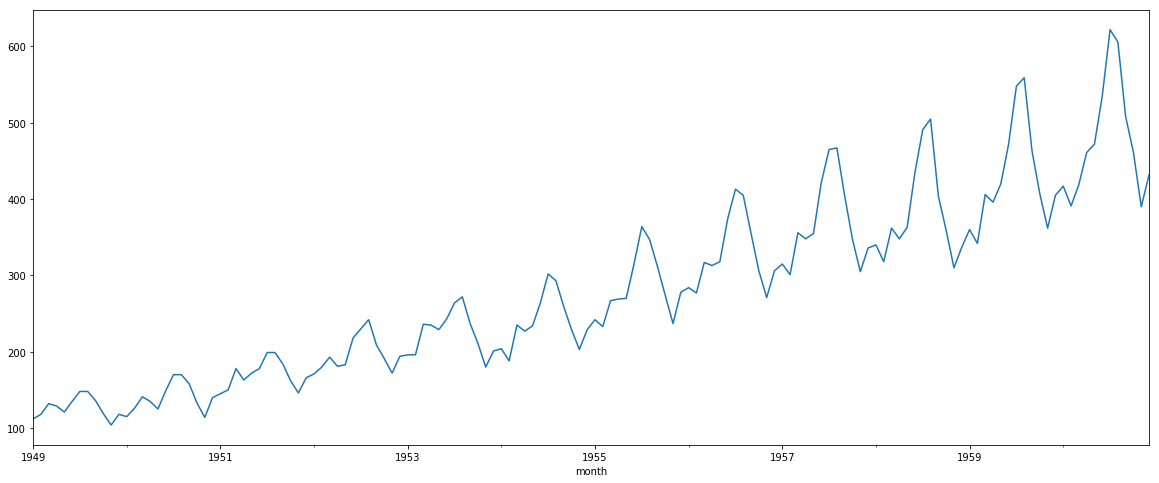

In [164]:
ts.plot(figsize=(20,8))

# TS assume stationary data, Dickey Fuller test, null hypothesis is not stationary 

In [165]:
from statsmodels.tsa.stattools import adfuller

In [166]:
result=adfuller(ts)

In [167]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))     #not stationary

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


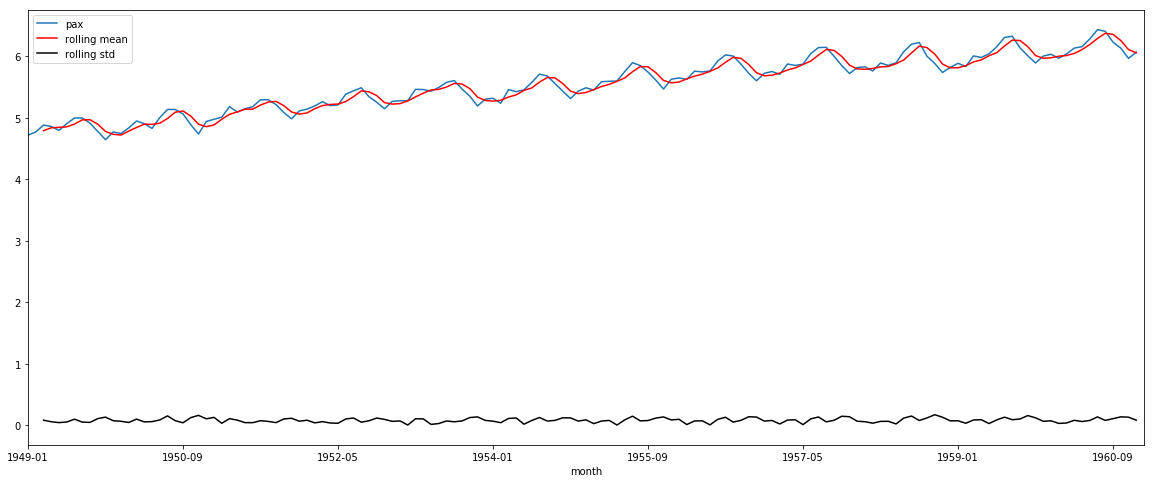

In [45]:
rmean=ts.rolling(window=3).mean()
rstd=ts.rolling(window=3).std()
ts.plot(figsize=(20,8))
rmean.plot(color='red',label='rolling mean')
rstd.plot(color='black',label='rolling std')
plt.legend()

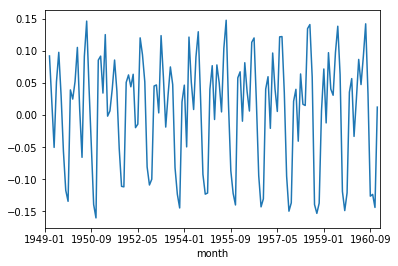

In [108]:
x=ts-rmean
x.plot() #eliminating trend

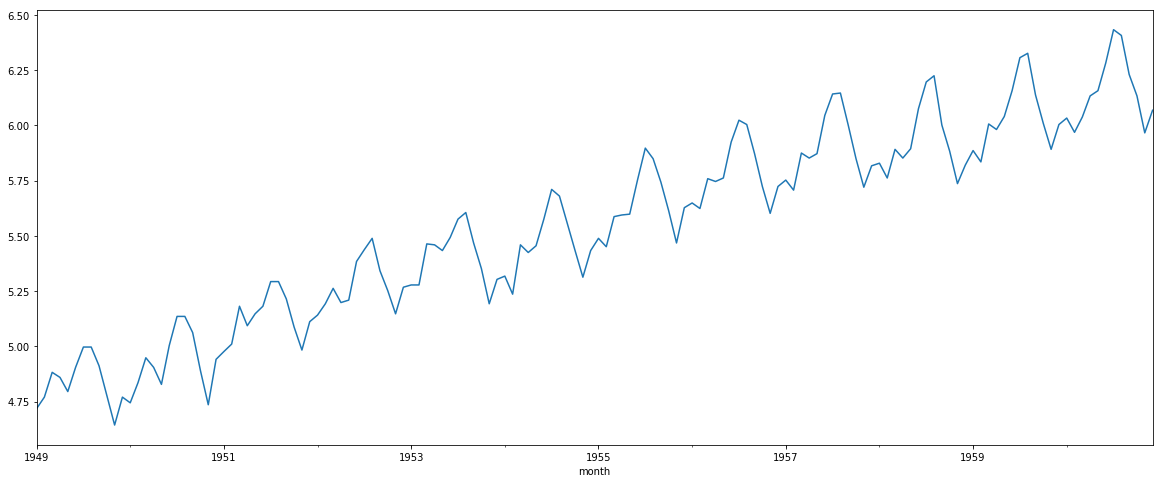

In [170]:
ts_log=np.log(ts)
ts_log.plot(figsize=(20,8))

In [171]:
result=adfuller(ts_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))   #still not stationary 

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


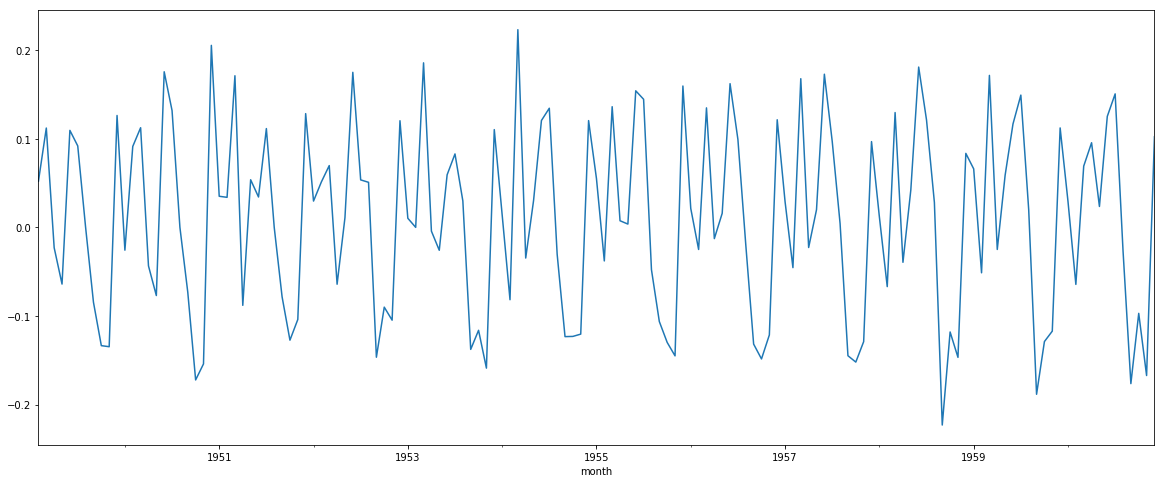

In [176]:
ts_log_diff=ts_log.diff(1)[1:]
ts_log_diff.plot(figsize=(20,8))

In [177]:
result=adfuller(ts_log_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value)) #90% confidence stationary 

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

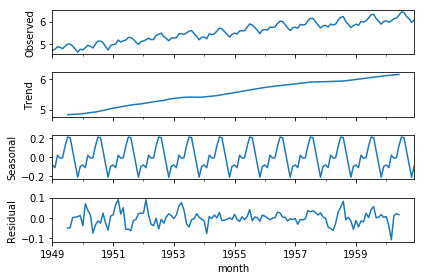

<Figure size 2160x720 with 0 Axes>

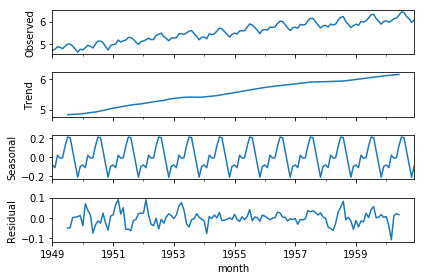

In [179]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(30,10))
decomposition.plot()

In [ ]:
# ARIMA assume no seasonal or seaonal data removed

In [99]:
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

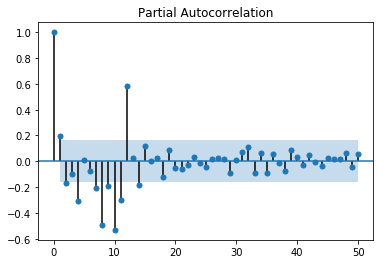

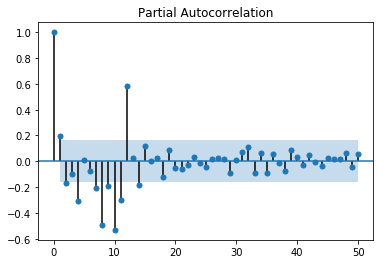

In [180]:
plot_pacf(ts_log_diff,lags=50)

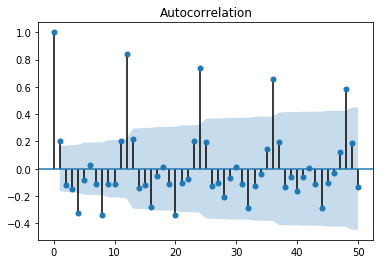

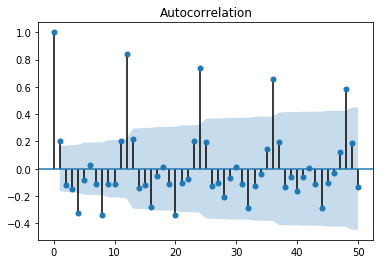

In [181]:
plot_acf(ts_log_diff,lags=50)

In [187]:
acf(ts_log_diff, nlags=50)

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439, -0.1073849 , -0.0752112 ,  0.19947518,  0.7369207 ,
        0.19726236, -0.1238843 , -0.10269904, -0.21099219, -0.06535684,
        0.01572846, -0.11537038, -0.28925562, -0.12688236, -0.04070684,
        0.14741061,  0.6574381 ,  0.19290864, -0.13431247, -0.06023711,
       -0.1627056 , -0.05802668,  0.00736649, -0.11095442, -0.28526755,
       -0.10617644, -0.03364527,  0.12402117,  0.58689883,  0.18653823,
       -0.13775391])

In [185]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [264]:
model=ARIMA(ts_log,order=(2,1,2))
result=model.fit()

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


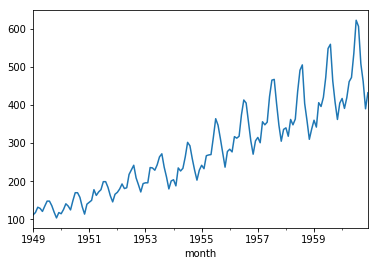

In [265]:
ts.plot()
np.exp(result.fittedvalues).plot(ax=ax,color='red')

In [355]:
model2=SARIMAX(ts_log[:-10],order=(1,0,1),seaonal_order=(1,0,1,12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)

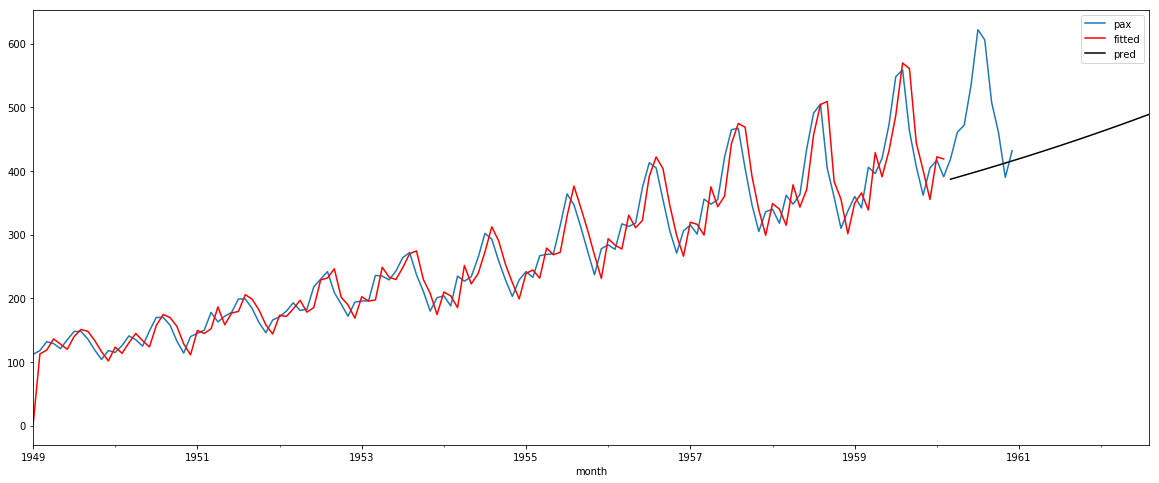

In [356]:
ts.plot(figsize=(20,8))
np.exp(model2.fittedvalues).plot(color='red',label='fitted')
np.exp(model2.forecast(30)).plot(color='black',label='pred')
plt.legend()

In [280]:
np.exp(model2.fittedvalues.tail())

month
1959-10-01    443.711591
1959-11-01    404.169836
1959-12-01    363.592472
1960-01-01    429.426549
1960-02-01    402.599891
dtype: float64

In [243]:
ts.tail()

month
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: pax, dtype: float64

In [299]:
np.exp(model2.forecast(10))

1960-03-01    398.587973
1960-04-01    400.734091
1960-05-01    403.421970
1960-06-01    404.597611
1960-07-01    405.624398
1960-08-01    406.175681
1960-09-01    406.587026
1960-10-01    406.830880
1960-11-01    407.000049
1960-12-01    407.105246
Freq: MS, dtype: float64

In [286]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    pax   No. Observations:                  134
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 117.061
Date:                Sat, 29 Dec 2018   AIC                           -224.122
Time:                        18:25:18   BIC                           -209.633
Sample:                    01-01-1949   HQIC                          -218.234
                         - 02-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2010      0.166      1.209      0.227      -0.125       0.527
ar.L2          0.2916      0.188      1.554      0.120      -0.076       0.660
ma.L1         -0.0575      0.115     -0.500      0.617      -0.283       0.168
ma.L2         -0.7056      0.135     -5.218      0.000      -0.971      -0.441
sigma2         0.0096      0.002      5.484      0.000       0.006       0.013
===================================================================================
Ljung-Box (Q):                      300.85   Jarque-Bera (JB):                 6.66
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               1.00   Skew:                            -0.01
Prob(H) (two-sided):                  1.00   Kurtosis:                         1.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


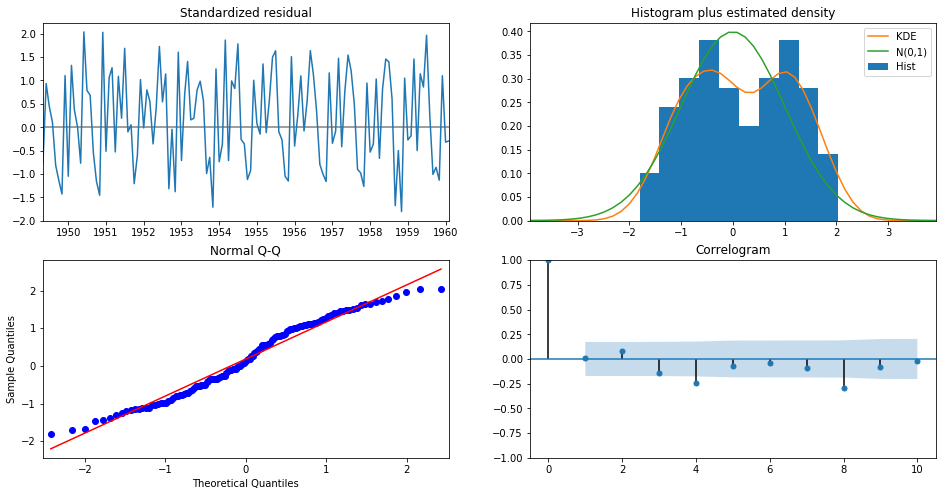

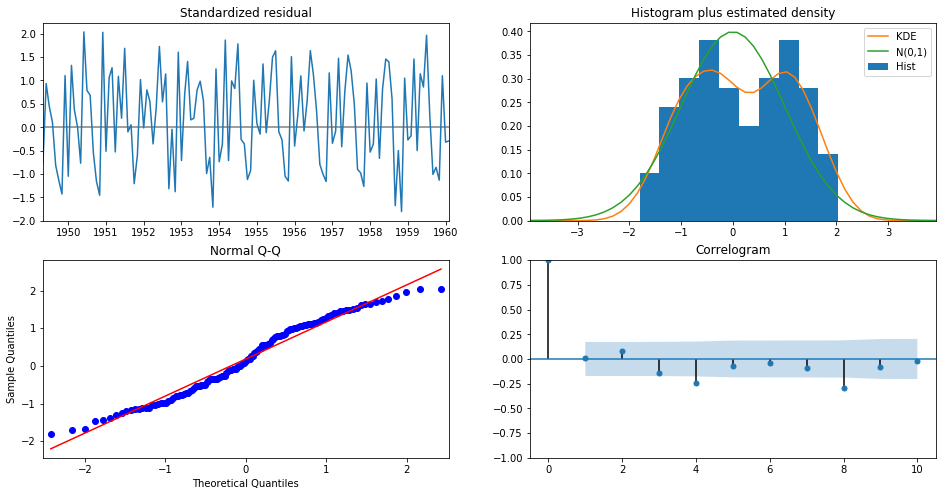

In [287]:
model2.plot_diagnostics(figsize=(16, 8))

# grid search

In [357]:
p = d = q = range(0, 3)
import itertools
pdq=list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [358]:
for i in pdq:
    for j in seasonal_pdq:
        try:
            x=SARIMAX(ts_log,order=i,seasonal_order=j,enforce_stationarity=False,enforce_invertibility=False).fit()
            print('ARIMA{}x{} - AIC:{}'.format(i, j, x.aic))
        except:
            continue

        

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:687.3749017314512
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:523.2544989226955
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:-179.2412295800487
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:-206.7285253682433


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:-276.1547946954474
ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:-239.88982373782227
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:-344.53629719317615
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:-342.6089190943794
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:-306.4414105099642
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:-225.9086914493485
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:-301.46045670732326
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:-324.55197518743597
ARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:-244.40717507479937
ARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:-259.7498015053399
ARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:-232.91972049167046
ARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:-307.9374872322591
ARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:-319.5741525048729
ARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:-314.0839166892168
ARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:-254.10078801060678
ARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:-296.7391473391613
ARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:-299.9257863887831


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 2, 0, 12) - AIC:-216.43845324045972
ARIMA(0, 0, 0)x(2, 2, 1, 12) - AIC:-238.74447142072654
ARIMA(0, 0, 0)x(2, 2, 2, 12) - AIC:-241.33213042067123
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:704.0097395065309
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:509.2224730088707


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:379.4271715608899
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:-254.34077322276573
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:-248.42231761454303
ARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:-252.29554104791583
ARIMA(0, 0, 1)x(0, 2, 0, 12) - AIC:-249.51318331627286
ARIMA(0, 0, 1)x(0, 2, 1, 12) - AIC:-311.67366055843854
ARIMA(0, 0, 1)x(0, 2, 2, 12) - AIC:-285.1523206225495
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:-396.27944661884584
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:-395.7137248310627


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:-340.957769839855


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:-271.43123412074067


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:-339.4992811031249
ARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:-353.00791588675435
ARIMA(0, 0, 1)x(1, 2, 0, 12) - AIC:-282.3140714706302
ARIMA(0, 0, 1)x(1, 2, 1, 12) - AIC:-296.68967240675255
ARIMA(0, 0, 1)x(1, 2, 2, 12) - AIC:-275.581379067292
ARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:-358.1086067762468
ARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:-366.5136329124698
ARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:-368.85341377907497
ARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:-293.00582497872483
ARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:-330.2123986020342
ARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:-327.67483633380556
ARIMA(0, 0, 1)x(2, 2, 0, 12) - AIC:-266.99709170785815
ARIMA(0, 0, 1)x(2, 2, 1, 12) - AIC:-280.5898851487583


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 2, 2, 12) - AIC:-275.8790876868984
ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:529.8004921311202
ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:354.9800042766132


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:322.79702348315533
ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:-322.68530289089557
ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:-311.08144628601264
ARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:-304.2305129672375
ARIMA(0, 0, 2)x(0, 2, 0, 12) - AIC:-283.4387006716791
ARIMA(0, 0, 2)x(0, 2, 1, 12) - AIC:-348.31684362079056
ARIMA(0, 0, 2)x(0, 2, 2, 12) - AIC:-307.0501133048327
ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:-404.1836692507116
ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:-401.3482696201802


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:-365.5129234004117
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:-317.9430124684333
ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:-368.3590982049331
ARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:-367.49629845993564
ARIMA(0, 0, 2)x(1, 2, 0, 12) - AIC:-318.7791394224819
ARIMA(0, 0, 2)x(1, 2, 1, 12) - AIC:-328.31358230505236


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 2, 2, 12) - AIC:-299.14475974042506
ARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:-366.4802174979285


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:-363.9599732176559


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:-383.5627620298593
ARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:-331.0230658048521
ARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:-357.1261388407328
ARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:-354.653108614488
ARIMA(0, 0, 2)x(2, 2, 0, 12) - AIC:-290.19916005312916
ARIMA(0, 0, 2)x(2, 2, 1, 12) - AIC:-306.9004979338606
ARIMA(0, 0, 2)x(2, 2, 2, 12) - AIC:-301.430155322424
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-296.95709212238455
ARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:-315.2737492355306
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:-421.5976809299506
ARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:-386.67329998812204
ARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:-336.54176888780313
ARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:-331.14089374042686
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:-437.39058517393755
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:-462.05751062558573
ARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:-411.1508863873213
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:-414.6592871369118
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:-413.3367808548201
ARIMA(0, 1, 0)x(1, 1, 2

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:-420.66508757924896
ARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:-389.84150292855213
ARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:-388.8546914439811
ARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:-386.1145599736116
ARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC:-304.09584815587436
ARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC:-316.4444060275557
ARIMA(0, 1, 0)x(2, 2, 2, 12) - AIC:-317.2649910144664
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:-234.53795644509867
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:-295.13911974085704
ARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:-312.8190349178455
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:-442.0383121459091
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:-435.44353154910544
ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:-397.0736551510955
ARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:-276.64844990647435
ARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:-352.2334521256063
ARIMA(0, 1, 1)x(0, 2, 2, 12) - AIC:-342.117999776269
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:-450.0243250407366
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:-472.5933391706977
ARIMA(0, 1, 1)x(1, 0, 

C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:-395.66972297657355


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:-325.2250750768056
ARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:-358.56370298269957
ARIMA(0, 1, 1)x(1, 2, 2, 12) - AIC:-325.3522349196176
ARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:-435.7240398847003
ARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:-434.04478126409344


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:-435.8413024938227
ARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:-400.7675610289684
ARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:-399.0591548167399
ARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:-394.6157299114451
ARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:-310.3438345222685
ARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:-329.5612276227886


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 2, 2, 12) - AIC:-327.16033787222864
ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:-233.71006378471824
ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:-288.81532150056285
ARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:-318.19172376747287
ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:-435.808963703479
ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:-429.64330873940696
ARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:-392.08853834227136
ARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:-271.3369387575463
ARIMA(0, 1, 2)x(0, 2, 1, 12) - AIC:-346.0776967522813
ARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:-343.24321983537664
ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:-448.1220891500844
ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:-466.6056835341557


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:-417.7379815588566
ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:-435.1177428654363
ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:-423.05901646060283
ARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:-393.4947634041025
ARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:-323.22896077739205
ARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:-352.57723360808393
ARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:-326.37060129983786
ARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:-433.72442900012874
ARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:-432.0654195769463


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:-429.4809138832859
ARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:-399.04504901344956


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:-397.26286529453915


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:-389.80021883591115
ARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:-308.362766529941


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:-327.62413512015445


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:-328.38499415579605
ARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:-219.9234790157152
ARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:-234.54193916791613
ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:-301.1451780089654
ARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:-283.8011695897013
ARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:-228.67943748680517
ARIMA(0, 2, 0)x(0, 2, 2, 12) - AIC:-236.3372847853334
ARIMA(0, 2, 0)x(1, 0, 0, 12) - AIC:-310.58259389144973
ARIMA(0, 2, 0)x(1, 0, 1, 12) - AIC:-331.7813663454798
ARIMA(0, 2, 0)x(1, 0, 2, 12) - AIC:-294.58278758071265
ARIMA(0, 2, 0)x(1, 1, 0, 12) - AIC:-287.9498962385721
ARIMA(0, 2, 0)x(1, 1, 1, 12) - AIC:-297.6704205940457
ARIMA(0, 2, 0)x(1, 1, 2, 12) - AIC:-286.29668983115414


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 2, 0, 12) - AIC:-195.27413109266834
ARIMA(0, 2, 0)x(1, 2, 1, 12) - AIC:-222.30622999458018
ARIMA(0, 2, 0)x(1, 2, 2, 12) - AIC:-220.0962220075414


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 0, 0, 12) - AIC:-292.4226647410402
ARIMA(0, 2, 0)x(2, 0, 1, 12) - AIC:-297.7145227087837
ARIMA(0, 2, 0)x(2, 0, 2, 12) - AIC:-303.06263686567144


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 1, 0, 12) - AIC:-283.034534930233
ARIMA(0, 2, 0)x(2, 1, 1, 12) - AIC:-285.20530175191806
ARIMA(0, 2, 0)x(2, 1, 2, 12) - AIC:-286.5503301233889


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 2, 0, 12) - AIC:-213.69750609027884
ARIMA(0, 2, 0)x(2, 2, 1, 12) - AIC:-212.4821868317659


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 2, 2, 12) - AIC:-209.98111643811245
ARIMA(0, 2, 1)x(0, 0, 0, 12) - AIC:-220.58858009359892
ARIMA(0, 2, 1)x(0, 0, 1, 12) - AIC:-287.44434222105434
ARIMA(0, 2, 1)x(0, 0, 2, 12) - AIC:-309.01813966366797
ARIMA(0, 2, 1)x(0, 1, 0, 12) - AIC:-416.95107309005834
ARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:-410.04894981909337
ARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:-375.22578020916
ARIMA(0, 2, 1)x(0, 2, 0, 12) - AIC:-257.3831272382366
ARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:-327.34151814132554


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 2, 12) - AIC:-319.5908874004015
ARIMA(0, 2, 1)x(1, 0, 0, 12) - AIC:-426.22417708516866
ARIMA(0, 2, 1)x(1, 0, 1, 12) - AIC:-445.99079124517954
ARIMA(0, 2, 1)x(1, 0, 2, 12) - AIC:-397.7609272257178
ARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:-403.4122298488999
ARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:-400.3348929752381
ARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:-377.37003674053153
ARIMA(0, 2, 1)x(1, 2, 0, 12) - AIC:-297.7392319471381
ARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:-324.7532443261165


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 2, 2, 12) - AIC:-303.96329263811623
ARIMA(0, 2, 1)x(2, 0, 0, 12) - AIC:-404.4047557679588
ARIMA(0, 2, 1)x(2, 0, 1, 12) - AIC:-403.0306170960357


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 2, 12) - AIC:-409.56482485669
ARIMA(0, 2, 1)x(2, 1, 0, 12) - AIC:-378.58053222088944
ARIMA(0, 2, 1)x(2, 1, 1, 12) - AIC:-378.08320730762284
ARIMA(0, 2, 1)x(2, 1, 2, 12) - AIC:-372.95245025906297
ARIMA(0, 2, 1)x(2, 2, 0, 12) - AIC:-293.28315977256574
ARIMA(0, 2, 1)x(2, 2, 1, 12) - AIC:-303.2312950716919


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 2, 2, 12) - AIC:-290.44235618823444
ARIMA(0, 2, 2)x(0, 0, 0, 12) - AIC:-224.63492623841637
ARIMA(0, 2, 2)x(0, 0, 1, 12) - AIC:-285.67153118120393
ARIMA(0, 2, 2)x(0, 0, 2, 12) - AIC:-303.4295800471846
ARIMA(0, 2, 2)x(0, 1, 0, 12) - AIC:-427.6266953094146
ARIMA(0, 2, 2)x(0, 1, 1, 12) - AIC:-424.18487379025436
ARIMA(0, 2, 2)x(0, 1, 2, 12) - AIC:-381.75196570902045
ARIMA(0, 2, 2)x(0, 2, 0, 12) - AIC:-267.6256370035291
ARIMA(0, 2, 2)x(0, 2, 1, 12) - AIC:-334.23811141848427


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(0, 2, 2, 12) - AIC:-334.8042488232712
ARIMA(0, 2, 2)x(1, 0, 0, 12) - AIC:-437.8738204962081
ARIMA(0, 2, 2)x(1, 0, 1, 12) - AIC:-455.8352675790923
ARIMA(0, 2, 2)x(1, 0, 2, 12) - AIC:-411.2043043144849
ARIMA(0, 2, 2)x(1, 1, 0, 12) - AIC:-424.49143678458495
ARIMA(0, 2, 2)x(1, 1, 1, 12) - AIC:-420.74925260309044


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 12) - AIC:-384.47742938793186
ARIMA(0, 2, 2)x(1, 2, 0, 12) - AIC:-313.363649403225
ARIMA(0, 2, 2)x(1, 2, 1, 12) - AIC:-341.4324769833126
ARIMA(0, 2, 2)x(1, 2, 2, 12) - AIC:-314.4248735614175
ARIMA(0, 2, 2)x(2, 0, 0, 12) - AIC:-423.0706692916648
ARIMA(0, 2, 2)x(2, 0, 1, 12) - AIC:-421.2200392237056


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 0, 2, 12) - AIC:-424.81337098143894
ARIMA(0, 2, 2)x(2, 1, 0, 12) - AIC:-388.5896691349795
ARIMA(0, 2, 2)x(2, 1, 1, 12) - AIC:-386.59187805601726
ARIMA(0, 2, 2)x(2, 1, 2, 12) - AIC:-378.81147828310066
ARIMA(0, 2, 2)x(2, 2, 0, 12) - AIC:-298.7163806074006


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 2, 1, 12) - AIC:-315.215299269382
ARIMA(0, 2, 2)x(2, 2, 2, 12) - AIC:-292.7027292746547
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:-231.275600868895


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:-297.4212776285667
ARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:-283.66277521515826
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:-436.5340234270075
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:-424.30030775790823
ARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:-390.99370160337315
ARIMA(1, 0, 0)x(0, 2, 0, 12) - AIC:-289.8227576750796
ARIMA(1, 0, 0)x(0, 2, 1, 12) - AIC:-352.17907686997324


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 2, 2, 12) - AIC:-338.9844552261385
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:-446.1887351538809
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:-472.00821938696106
ARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:-423.2906296263812
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:-414.78267989974773
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:-416.29346642119356


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:-392.1632751675536
ARIMA(1, 0, 0)x(1, 2, 0, 12) - AIC:-321.7978484647965
ARIMA(1, 0, 0)x(1, 2, 1, 12) - AIC:-349.5474560867925


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 2, 2, 12) - AIC:-325.98238886601933
ARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:-413.9685781066894
ARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:-423.25965531881553


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:-429.2904680919993


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:-389.4831818356617
ARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:-388.56125225513335
ARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:-389.236856748843
ARIMA(1, 0, 0)x(2, 2, 0, 12) - AIC:-311.4697688522252
ARIMA(1, 0, 0)x(2, 2, 1, 12) - AIC:-324.51491845247506
ARIMA(1, 0, 0)x(2, 2, 2, 12) - AIC:-327.8128956685958
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:-234.5693109683699
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:-294.89752430965734
ARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:-269.5047026085903
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:-445.61661679640275
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:-436.9445890123092


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:-396.617997850398
ARIMA(1, 0, 1)x(0, 2, 0, 12) - AIC:-288.6007897738988


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 2, 1, 12) - AIC:-352.7639811241758


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 2, 2, 12) - AIC:-343.17865003641606
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:-451.38753065902415
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-477.6193816089461


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-428.98938150859664


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:-436.07845446844385
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-431.57218685279014
ARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-394.76843528493197
ARIMA(1, 0, 1)x(1, 2, 0, 12) - AIC:-328.77641453507937
ARIMA(1, 0, 1)x(1, 2, 1, 12) - AIC:-359.24974554564784
ARIMA(1, 0, 1)x(1, 2, 2, 12) - AIC:-328.8379045474509
ARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:-434.63121059620073
ARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-434.6934586856176


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-438.5990979121014
ARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:-399.95809351068226
ARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-398.1994587550216


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-394.18600670237635
ARIMA(1, 0, 1)x(2, 2, 0, 12) - AIC:-313.11752849219073
ARIMA(1, 0, 1)x(2, 2, 1, 12) - AIC:-331.48922530686605


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 2, 2, 12) - AIC:-328.1819782782671
ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:-235.27444427422677
ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:-240.1506495717651
ARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:-270.52127783164457
ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:-439.3055621700037
ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:-432.43238345761
ARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:-395.66203977178685
ARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:-286.55791873382464
ARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:-353.50528747384885


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:-339.25052468470955
ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:-449.6306881704885
ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:-471.15080843088697


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:-424.6738241452302
ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:-434.08030459967694
ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:-426.3350166180957
ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:-393.6885523133704


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:-327.2564920603546
ARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:-358.2136908892302


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:-325.4814240763202
ARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:-432.6344484571283


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:-432.83767337119457


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:-436.68238233857494
ARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:-398.188286505019


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:-396.3804067115387
ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:-378.13871119464295
ARIMA(1, 0, 2)x(2, 2, 0, 12) - AIC:-311.28519015570726
ARIMA(1, 0, 2)x(2, 2, 1, 12) - AIC:-329.5021965019565


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 2, 12) - AIC:-327.17868974116925
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:-234.20009826267056
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:-296.65935051479704
ARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:-313.2763680142804
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:-445.41397115453884


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:-437.52581537126304
ARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:-395.10684790632564


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 2, 0, 12) - AIC:-280.2572459309773
ARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:-351.11815844029417


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:-341.15932710118267
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:-445.92030843027317
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:-474.892002558936
ARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:-424.4564520627488
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:-431.33471492834883
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:-429.77765730318555
ARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:-394.78153186651775


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:-321.1186448244697
ARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:-355.77940670191504
ARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:-323.2702603682424
ARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:-430.6483941008032
ARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:-428.78550240403695


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:-432.54498217244077
ARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:-394.36032351490326


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:-392.95176787149643


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:-393.31120270353114
ARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:-306.1715544279975
ARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:-324.12924098757543


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 2, 2, 12) - AIC:-325.47268427879817
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:-238.09413780949427
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:-299.1791362101482
ARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:-325.5775027312123
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:-440.30388006043836
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:-433.78507181347413
ARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:-395.24789639743324
ARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:-277.01755600923286
ARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:-351.5191225578386


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 2, 2, 12) - AIC:-340.19466553360934
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:-443.9426808793762
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:-471.1330722869177


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:-420.4280830193353
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:-431.4799460594358
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:-427.0345527486686


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:-395.8763995351945


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:-320.4377574635319
ARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:-356.6424178474567
ARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:-323.7296947282067
ARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:-429.1808794615763
ARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:-428.5418243320296


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:-434.13785622044355
ARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:-394.5762368041372
ARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:-392.8567612190183


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:-392.6616299286866
ARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:-304.875504574418
ARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:-324.57612510297776


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:-325.3890912260221
ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:-241.8869112474614
ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:-297.61357761022396
ARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:-317.9042723526821
ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:-434.5886596073056
ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:-427.44370304567036


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:-389.78366300008634
ARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:-272.5558237313263


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:-345.74992416652054


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 2, 2, 12) - AIC:-343.56708650864715
ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:-449.4625065711515
ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:-466.2616024547084
ARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:-416.97790911163156
ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:-434.10419659742655
ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:-420.91757135314447


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:-391.7605720649917


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 2, 0, 12) - AIC:-322.4110361791556
ARIMA(1, 1, 2)x(1, 2, 1, 12) - AIC:-352.9488971066728


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:-324.98106592405037


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:-432.6970387578903


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:-427.7677615630237


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:-430.7479087648042


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:-392.98559172889736
ARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:-390.4554568576553


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:-385.8830396115246
ARIMA(1, 1, 2)x(2, 2, 0, 12) - AIC:-302.84244394802363


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:-322.7647309807378


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:-326.16750775648694
ARIMA(1, 2, 0)x(0, 0, 0, 12) - AIC:-173.76579045569923
ARIMA(1, 2, 0)x(0, 0, 1, 12) - AIC:-240.51957484100885
ARIMA(1, 2, 0)x(0, 0, 2, 12) - AIC:-266.3629592486809
ARIMA(1, 2, 0)x(0, 1, 0, 12) - AIC:-373.6099860012669
ARIMA(1, 2, 0)x(0, 1, 1, 12) - AIC:-368.39444896392376
ARIMA(1, 2, 0)x(0, 1, 2, 12) - AIC:-337.1988639488996
ARIMA(1, 2, 0)x(0, 2, 0, 12) - AIC:-223.0191334147701


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 2, 1, 12) - AIC:-299.583902933358


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(0, 2, 2, 12) - AIC:-276.33649286868734
ARIMA(1, 2, 0)x(1, 0, 0, 12) - AIC:-376.2861035171221
ARIMA(1, 2, 0)x(1, 0, 1, 12) - AIC:-399.07285142113676


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(1, 0, 2, 12) - AIC:-358.1554628776598
ARIMA(1, 2, 0)x(1, 1, 0, 12) - AIC:-359.5301998637344
ARIMA(1, 2, 0)x(1, 1, 1, 12) - AIC:-358.50848677888973
ARIMA(1, 2, 0)x(1, 1, 2, 12) - AIC:-338.1930001780649
ARIMA(1, 2, 0)x(1, 2, 0, 12) - AIC:-266.96238951699195
ARIMA(1, 2, 0)x(1, 2, 1, 12) - AIC:-291.37491826823936
ARIMA(1, 2, 0)x(1, 2, 2, 12) - AIC:-260.37833641388005
ARIMA(1, 2, 0)x(2, 0, 0, 12) - AIC:-362.93828370590154
ARIMA(1, 2, 0)x(2, 0, 1, 12) - AIC:-362.67634023201305
ARIMA(1, 2, 0)x(2, 0, 2, 12) - AIC:-369.1123178074391
ARIMA(1, 2, 0)x(2, 1, 0, 12) - AIC:-334.2736204011568
ARIMA(1, 2, 0)x(2, 1, 1, 12) - AIC:-332.3412334801557
ARIMA(1, 2, 0)x(2, 1, 2, 12) - AIC:-336.6847016484634
ARIMA(1, 2, 0)x(2, 2, 0, 12) - AIC:-256.5553139944047
ARIMA(1, 2, 0)x(2, 2, 1, 12) - AIC:-270.7453132789229


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 0)x(2, 2, 2, 12) - AIC:-248.49979059734528
ARIMA(1, 2, 1)x(0, 0, 0, 12) - AIC:-224.27459774481832
ARIMA(1, 2, 1)x(0, 0, 1, 12) - AIC:-287.1103767128688
ARIMA(1, 2, 1)x(0, 0, 2, 12) - AIC:-307.0472346202977
ARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:-430.8073447967527


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 1, 1, 12) - AIC:-423.1220146060084
ARIMA(1, 2, 1)x(0, 1, 2, 12) - AIC:-384.03233311309464


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 0, 12) - AIC:-267.83975953159853
ARIMA(1, 2, 1)x(0, 2, 1, 12) - AIC:-338.45454143795104


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(0, 2, 2, 12) - AIC:-336.31219607983496
ARIMA(1, 2, 1)x(1, 0, 0, 12) - AIC:-434.6196153687578
ARIMA(1, 2, 1)x(1, 0, 1, 12) - AIC:-458.46429073427663
ARIMA(1, 2, 1)x(1, 0, 2, 12) - AIC:-409.8525007565991
ARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:-421.3741235315978
ARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:-416.0976774267627


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:-386.2469372456246
ARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:-312.8577147377282


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:-342.5640950408194


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC:-315.6741134771014
ARIMA(1, 2, 1)x(2, 0, 0, 12) - AIC:-419.17733271243384
ARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:-417.19339925381564
ARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:-422.5276000692144
ARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:-384.84313194387755
ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:-383.58328102091093


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:-379.05247607654564
ARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:-298.8109612055811
ARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:-315.57544903703683


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:-308.98431643862955
ARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:-228.64402293491202
ARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:-290.2982018096339
ARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:-314.9210279058268
ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:-425.73085807045555


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:-422.18919407131375


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:-379.5502992467338
ARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:-267.2217227911537
ARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:-334.4095006513577


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:-327.8940155133722
ARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:-432.69177773598943


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:-453.9809990003576


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:-409.21542730095115
ARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:-420.9975962913158


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:-419.0129696679402


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:-383.75541704264526
ARIMA(1, 2, 2)x(1, 2, 0, 12) - AIC:-311.48339874901615
ARIMA(1, 2, 2)x(1, 2, 1, 12) - AIC:-339.43258618193863


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:-314.96419529722
ARIMA(1, 2, 2)x(2, 0, 0, 12) - AIC:-417.19916484273335
ARIMA(1, 2, 2)x(2, 0, 1, 12) - AIC:-415.2649935088438


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 0, 2, 12) - AIC:-423.2923225448401
ARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:-384.43396424392733


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 1, 12) - AIC:-382.8662103721087


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:-373.11163781192596


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 0, 12) - AIC:-297.226864888341


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 1, 12) - AIC:-312.19034685939033


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 2, 12) - AIC:-284.41882476364736
ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:-232.66009106196617
ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:-296.9394699771676
ARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:-273.18621079958274
ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:-445.25845979212943
ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:-440.2094562990598
ARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:-399.42039164920374


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(0, 2, 0, 12) - AIC:-289.90375146719913
ARIMA(2, 0, 0)x(0, 2, 1, 12) - AIC:-359.39532984130074
ARIMA(2, 0, 0)x(0, 2, 2, 12) - AIC:-345.0143884002761
ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:-444.01443375816467
ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:-476.7752393108069
ARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:-432.4213959862571
ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC:-430.36418584810343
ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:-428.9680972799262


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:-399.16745115021206
ARIMA(2, 0, 0)x(1, 2, 0, 12) - AIC:-326.757464293931
ARIMA(2, 0, 0)x(1, 2, 1, 12) - AIC:-359.4118616296371
ARIMA(2, 0, 0)x(1, 2, 2, 12) - AIC:-330.96057647112247
ARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:-428.9374974966359
ARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:-429.37532759684865


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:-434.2319299920294
ARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:-393.72951803449234
ARIMA(2, 0, 0)x(2, 1, 1, 12) - AIC:-392.2211101514911
ARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:-390.24745371795694
ARIMA(2, 0, 0)x(2, 2, 0, 12) - AIC:-309.87411928844114
ARIMA(2, 0, 0)x(2, 2, 1, 12) - AIC:-327.8874330589483


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 2, 2, 12) - AIC:-328.48410837718956
ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:-237.81323068529625


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:-269.40348847279887


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:-272.0035578351546
ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:-443.2588886680469
ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:-434.97038835973376


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:-394.76943787076596
ARIMA(2, 0, 1)x(0, 2, 0, 12) - AIC:-292.0142593723606


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 2, 1, 12) - AIC:-354.6879894149172


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 2, 2, 12) - AIC:-341.10933173374355
ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:-447.0636547788257


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:-475.1187522406531


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:-426.0927870537841
ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:-430.3526686938203


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:-429.7748743003789


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:-395.16686773229316
ARIMA(2, 0, 1)x(1, 2, 0, 12) - AIC:-329.13682476446337
ARIMA(2, 0, 1)x(1, 2, 1, 12) - AIC:-357.67947541104417


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 2, 2, 12) - AIC:-326.79947953128004
ARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:-427.587330836142


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:-428.51091276276657


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:-432.9557624215697


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:-393.5543498644946


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:-391.3737146964208


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:-391.20467120415196


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 2, 0, 12) - AIC:-307.87409824417045


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 2, 1, 12) - AIC:-326.08408644828955


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 2, 2, 12) - AIC:-326.77509714494994


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:-256.8785586143133


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:-239.05587937894583
ARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:-264.6651167591843
ARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:-438.11539591550627


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC:-430.6421861798426


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 1, 2, 12) - AIC:-393.29663080213896
ARIMA(2, 0, 2)x(0, 2, 0, 12) - AIC:-287.8621013899822


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 2, 1, 12) - AIC:-354.91217290626906


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 2, 2, 12) - AIC:-339.6792679462991


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:-445.13245023131327


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:-470.22508866837865


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:-422.45120214726103
ARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:-428.5155654417239
ARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:-424.20667626054524


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:-391.2290893094909


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 2, 0, 12) - AIC:-327.68062894792246
ARIMA(2, 0, 2)x(1, 2, 1, 12) - AIC:-356.93625307275306


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 2, 2, 12) - AIC:-325.02506492013595


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:-426.66285563639076


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:-423.96560110637574


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:-432.29410990097466
ARIMA(2, 0, 2)x(2, 1, 0, 12) - AIC:-391.3176683486898


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:-389.57295156486543
ARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:-380.7730581072638


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 2, 0, 12) - AIC:-305.8456247931531
ARIMA(2, 0, 2)x(2, 2, 1, 12) - AIC:-324.4370191375891


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 2, 2, 12) - AIC:-324.9812132236625
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:-234.38627043946536
ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:-295.6311981262006
ARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:-311.31461312160764
ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:-439.08939379356514
ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:-435.64811159403524
ARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:-393.6673277019538
ARIMA(2, 1, 0)x(0, 2, 0, 12) - AIC:-275.2764119578043


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 2, 1, 12) - AIC:-349.410695563136


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 2, 2, 12) - AIC:-340.99254140303833
ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:-439.66354790159664
ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:-469.0016305848985


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:-422.9444988637022
ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:-426.4776805074596
ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:-425.08197345570954
ARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:-392.80817814403946
ARIMA(2, 1, 0)x(1, 2, 0, 12) - AIC:-320.32472434646456
ARIMA(2, 1, 0)x(1, 2, 1, 12) - AIC:-355.35825771100826
ARIMA(2, 1, 0)x(1, 2, 2, 12) - AIC:-323.47121248722794
ARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:-425.8279664066042


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:-424.10643771791695


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:-430.5793857979364
ARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:-392.43061460872576
ARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:-391.68486897454784


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:-391.4711416076839
ARIMA(2, 1, 0)x(2, 2, 0, 12) - AIC:-304.4766044642867
ARIMA(2, 1, 0)x(2, 2, 1, 12) - AIC:-325.6233999920089


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 2, 2, 12) - AIC:-324.3729062563979
ARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:-246.13964940845526
ARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:-301.92477089763514
ARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:-316.2672391367695
ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:232.74992924875949


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:34.44494712107597


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:-377.3602886769275
ARIMA(2, 1, 1)x(0, 2, 0, 12) - AIC:-274.1253964700835
ARIMA(2, 1, 1)x(0, 2, 1, 12) - AIC:-349.459964067355


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:-338.67243970216003
ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:-446.58973016127857
ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-470.84412392471165


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-421.68095389600876


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:83.64784671845493
ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:-421.93481892947284


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:-323.8989999433915
ARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:-318.62659036053134
ARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:-333.77060762366267


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:-320.25458408903376
ARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:-425.33258091464495


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:-423.296621558402


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:-428.5961326631267
ARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:-390.5590559718645


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:-214.73300197565456


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:-114.46504875399714


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:-302.406384283219
ARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:-308.00225831121196


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:-304.6187955129074


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:-271.8871783668013
ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:-316.83541255102966


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:-324.24559198524986
ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:-439.4110642316097


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:-428.71731516573385


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:-389.8284762747254
ARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:-279.71734230972413
ARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:-345.52424065189985


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 2, 2, 12) - AIC:-340.87110848927506
ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:-446.58417228112614
ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:-465.61092798887034


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:-415.4031315729869


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:-428.1203684535707


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:-421.7784259337683


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:-389.7762972573627
ARIMA(2, 1, 2)x(1, 2, 0, 12) - AIC:-321.54600329977904
ARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:-350.0578211840127


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:-322.42883113544553


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:-428.11239849717447


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:-426.7341254350119


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:-425.41036102026743


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:-390.71404064700585


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:-390.42453080769604


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:-385.7644231796518
ARIMA(2, 1, 2)x(2, 2, 0, 12) - AIC:-301.07281497867467


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 1, 12) - AIC:-323.0903890273335


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 2, 12) - AIC:-322.48638225606584
ARIMA(2, 2, 0)x(0, 0, 0, 12) - AIC:-183.34735928691867


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(0, 0, 1, 12) - AIC:-245.36049837978726
ARIMA(2, 2, 0)x(0, 0, 2, 12) - AIC:-269.51754761383603
ARIMA(2, 2, 0)x(0, 1, 0, 12) - AIC:-379.7068829332399
ARIMA(2, 2, 0)x(0, 1, 1, 12) - AIC:-383.3048505455282
ARIMA(2, 2, 0)x(0, 1, 2, 12) - AIC:-349.4030649186196
ARIMA(2, 2, 0)x(0, 2, 0, 12) - AIC:-223.72292985584787
ARIMA(2, 2, 0)x(0, 2, 1, 12) - AIC:-305.0310078167054


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(0, 2, 2, 12) - AIC:-303.2640638825535
ARIMA(2, 2, 0)x(1, 0, 0, 12) - AIC:-381.83919412415395
ARIMA(2, 2, 0)x(1, 0, 1, 12) - AIC:-411.67521033858065
ARIMA(2, 2, 0)x(1, 0, 2, 12) - AIC:-370.69707145742257
ARIMA(2, 2, 0)x(1, 1, 0, 12) - AIC:-371.7332795085319
ARIMA(2, 2, 0)x(1, 1, 1, 12) - AIC:-370.83675521286307
ARIMA(2, 2, 0)x(1, 1, 2, 12) - AIC:-348.8545296519156
ARIMA(2, 2, 0)x(1, 2, 0, 12) - AIC:-269.3137961447391


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(1, 2, 1, 12) - AIC:-303.04371524238076


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(1, 2, 2, 12) - AIC:-282.7135079987228


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(2, 0, 0, 12) - AIC:-373.51312256738106
ARIMA(2, 2, 0)x(2, 0, 1, 12) - AIC:-371.5282301527065


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(2, 0, 2, 12) - AIC:-379.4361726316204
ARIMA(2, 2, 0)x(2, 1, 0, 12) - AIC:-343.99924044704517
ARIMA(2, 2, 0)x(2, 1, 1, 12) - AIC:-342.61413649231224


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(2, 1, 2, 12) - AIC:-343.6538592610591
ARIMA(2, 2, 0)x(2, 2, 0, 12) - AIC:-267.42028630154124
ARIMA(2, 2, 0)x(2, 2, 1, 12) - AIC:-281.7307539888983


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(2, 2, 2, 12) - AIC:-275.628135706182
ARIMA(2, 2, 1)x(0, 0, 0, 12) - AIC:-225.60357243409976
ARIMA(2, 2, 1)x(0, 0, 1, 12) - AIC:-285.8791614320962
ARIMA(2, 2, 1)x(0, 0, 2, 12) - AIC:-305.0877774075534


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(0, 1, 0, 12) - AIC:-428.81226282253147
ARIMA(2, 2, 1)x(0, 1, 1, 12) - AIC:-421.29065791495924
ARIMA(2, 2, 1)x(0, 1, 2, 12) - AIC:-382.54611553334877
ARIMA(2, 2, 1)x(0, 2, 0, 12) - AIC:-266.185942684261
ARIMA(2, 2, 1)x(0, 2, 1, 12) - AIC:-336.99517580992926


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(0, 2, 2, 12) - AIC:-335.634083409658
ARIMA(2, 2, 1)x(1, 0, 0, 12) - AIC:-429.27474734477914
ARIMA(2, 2, 1)x(1, 0, 1, 12) - AIC:-456.0648376757907


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 0, 2, 12) - AIC:-408.60058270163756
ARIMA(2, 2, 1)x(1, 1, 0, 12) - AIC:-416.5283046894932
ARIMA(2, 2, 1)x(1, 1, 1, 12) - AIC:-414.80298225333877


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 1, 2, 12) - AIC:-385.8428537347494
ARIMA(2, 2, 1)x(1, 2, 0, 12) - AIC:-308.8157665716782
ARIMA(2, 2, 1)x(1, 2, 1, 12) - AIC:-341.1234008980638


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 2, 2, 12) - AIC:-314.9392000276423
ARIMA(2, 2, 1)x(2, 0, 0, 12) - AIC:-414.3983140722804


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 0, 1, 12) - AIC:-413.30169349408186


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 0, 2, 12) - AIC:-421.7507828869125
ARIMA(2, 2, 1)x(2, 1, 0, 12) - AIC:-379.39141362723836


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 1, 1, 12) - AIC:-378.18438434919335


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 1, 2, 12) - AIC:-377.9603963037614
ARIMA(2, 2, 1)x(2, 2, 0, 12) - AIC:-294.61400187631466


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 2, 1, 12) - AIC:-311.3444553747462


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 2, 2, 12) - AIC:-298.32317630128006
ARIMA(2, 2, 2)x(0, 0, 0, 12) - AIC:-225.66316133873772
ARIMA(2, 2, 2)x(0, 0, 1, 12) - AIC:-288.4738402581809


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 0, 2, 12) - AIC:-313.33311897498874
ARIMA(2, 2, 2)x(0, 1, 0, 12) - AIC:-423.05253301738605
ARIMA(2, 2, 2)x(0, 1, 1, 12) - AIC:-420.01990067142214
ARIMA(2, 2, 2)x(0, 1, 2, 12) - AIC:-377.8102508343869
ARIMA(2, 2, 2)x(0, 2, 0, 12) - AIC:-265.35909258151304


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 2, 1, 12) - AIC:-332.411044574597


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 2, 2, 12) - AIC:-332.4039056026269


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 0, 12) - AIC:-427.41435806061554


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 1, 12) - AIC:-452.7145849441079


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 0, 2, 12) - AIC:-407.3142557668824


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 0, 12) - AIC:-416.44865540448814


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 1, 12) - AIC:-417.4757433844923


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 2, 12) - AIC:-379.3175455813757
ARIMA(2, 2, 2)x(1, 2, 0, 12) - AIC:-307.67910885267383
ARIMA(2, 2, 2)x(1, 2, 1, 12) - AIC:-335.749342029729


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 2, 12) - AIC:-313.1611533870742


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 0, 12) - AIC:-418.36754089872926


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 1, 12) - AIC:-415.5761534278436


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 0, 2, 12) - AIC:-421.80663321821703


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 0, 12) - AIC:-378.92984496632926


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 1, 12) - AIC:-376.05594103793055


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 2, 12) - AIC:-373.0122266523102
ARIMA(2, 2, 2)x(2, 2, 0, 12) - AIC:-292.59550762754407
ARIMA(2, 2, 2)x(2, 2, 1, 12) - AIC:-309.2467984306992


C:\Users\lixinzhu21\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 2, 2, 12) - AIC:-282.2448888935851


In [343]:
j=seasonal_pdq[2]
i=pdq[1]

In [344]:
x=SARIMAX(ts_log,order=i,seasonal_order=j,enforce_stationarity=False,enforce_invertibility=False).fit()

In [352]:
for j in range(1,8):
    print(j)

1
2
3
4
5
6
7
